## **Techniques for Balancing the Target Variable**

#### **1. Random Under-sampling**

Random under-sampling reduces the number of samples in the majority classes to match the minority class. This can lead to potential loss of information.


```python
from imblearn.under_sampling import RandomUnderSampler

# Implementation of Random Under-sampling
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(df[['text']], df['target'])

# New balanced dataset
balanced_df = pd.DataFrame({'text': X_resampled['text'], 'target': y_resampled})
print(balanced_df['target'].value_counts())
```

#### **2. Random Over-sampling**

Random over-sampling increases the number of samples in the minority classes by duplicating them. This can lead to overfitting.


```python
from imblearn.over_sampling import RandomOverSampler

# Implementation of Random Over-sampling
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(df[['text']], df['target'])

# New balanced dataset
balanced_df = pd.DataFrame({'text': X_resampled['text'], 'target': y_resampled})
print(balanced_df['target'].value_counts())
```
#### **3. SMOTE (Synthetic Minority Over-sampling Technique)**

SMOTE generates synthetic samples for the minority classes by interpolating between existing samples.

```python
from imblearn.over_sampling import SMOTE
import pandas as pd

# Implementation of SMOTE
X = df[['text']]
y = df['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# New balanced dataset
balanced_df = pd.DataFrame({'text': X_resampled['text'], 'target': y_resampled})
print(balanced_df['target'].value_counts())
```



## **Problem Statement**

The rapid growth of social media platforms like Twitter has resulted in a vast amount of user-generated content that reflects public opinions on various entities such as products, companies, public figures, and events. Analyzing these opinions can provide valuable insights for businesses, policymakers, and individuals. However, manually sifting through and interpreting this content is impractical due to its sheer volume and the speed at which it is produced. There is a need for an automated solution to accurately assess the sentiment expressed in tweets concerning specific entities.

## **Aim of the Project**

The aim of this project is to develop a machine learning model capable of performing entity-level sentiment analysis on Twitter data. Specifically, the model will classify the sentiment of tweets related to a given entity into one of three categories: Positive, Negative, or Neutral. Tweets that are irrelevant to the entity will also be classified as Neutral. This classification will be achieved using the provided Twitter Sentiment Analysis Dataset, consisting of a training set (`twitter_training.csv`) and a validation set (`twitter_validation.csv`).

## **How the Solution Solves the Problem**

The proposed solution automates sentiment analysis on Twitter, providing timely and entity-specific insights from large volumes of tweets. By using machine learning to classify sentiments as Positive, Negative, or Neutral, the model enables businesses to quickly understand public opinions and make informed decisions based on real-time data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import re
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data
val = pd.read_csv("/content/drive/My Drive/TWITTER_DATASET/twitter_validation.csv", header=None)
train = pd.read_csv("/content/drive/My Drive/TWITTER_DATASET/twitter_training.csv", header=None)

In [5]:
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
val.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
# Rename columns
train.columns = ['id', 'information', 'type', 'text']
val.columns = ['id', 'information', 'type', 'text']

In [8]:
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74682 non-null  int64 
 1   information  74682 non-null  object
 2   type         74682 non-null  object
 3   text         73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [11]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   information  1000 non-null   object
 2   type         1000 non-null   object
 3   text         1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [12]:
# Initialize SpaCy
nlp = spacy.load("en_core_web_sm")

In [13]:
# Function to preprocess text
def preprocess_text(text):
    if not isinstance(text, str):
    # Convert non-string values to string
        text = str(text)
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z0-9 ]+', ' ', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and not token.is_punct and not token.is_space]
    return ' '.join(tokens)

In [14]:
# Apply preprocessing
train['cleaned_text'] = train['text'].apply(preprocess_text)
val['cleaned_text'] = val['text'].apply(preprocess_text)

In [15]:
train['type'].value_counts()

type
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [16]:
# Balance the dataset using Random under-sampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train[['cleaned_text']], train['type'])
balanced_train = pd.DataFrame({'cleaned_text': X_resampled['cleaned_text'], 'type': y_resampled})


In [17]:
balanced_train.head()

,cleaned_text,type
0,appreciate sonic concept praxis valenzuela lan...,Irrelevant
1,appreciate sound concept practice valenzuela l...,Irrelevant
2,evaluate sound concept concept valensela landa...,Irrelevant
3,appreciate sonic concept praxis valenzuela mor...,Irrelevant
4,appreciate sonic electronic concept praxis val...,Irrelevant


In [18]:
balanced_train['type'].value_counts()

type
Irrelevant    12990
Negative      12990
Neutral       12990
Positive      12990
Name: count, dtype: int64

In [19]:
# Display word cloud for positive and negative sentiments
def generate_wordcloud(text, title):
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black", scale=10, width=800, height=800).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

In [20]:
# Generate word cloud for positive and negative sentiments
positive_text = ' '.join(balanced_train[balanced_train['type'] == "Positive"]['cleaned_text'])
negative_text = ' '.join(balanced_train[balanced_train['type'] == "Negative"]['cleaned_text'])


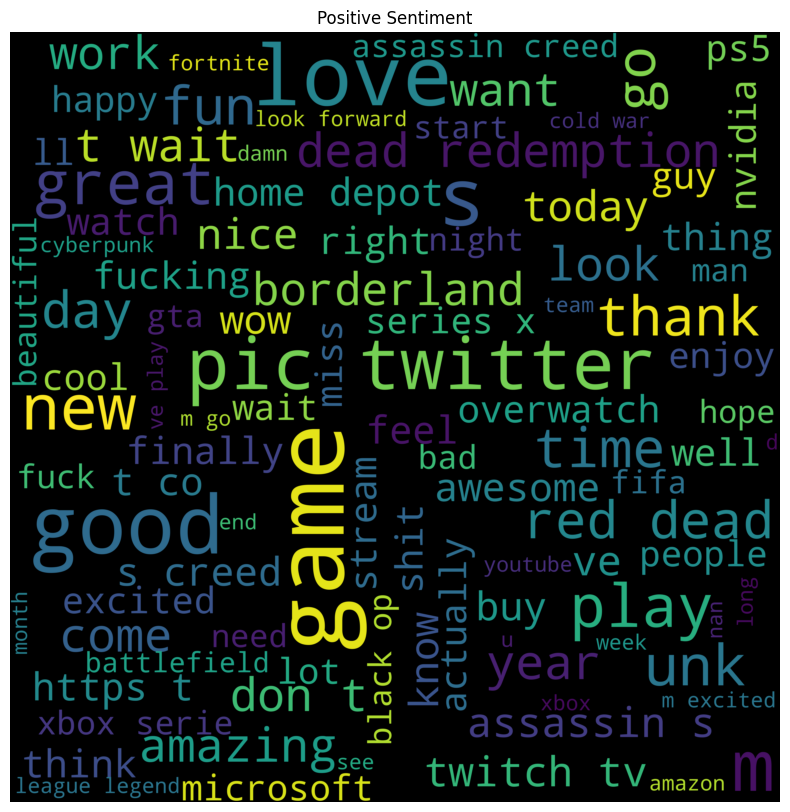

In [21]:
generate_wordcloud(positive_text, "Positive Sentiment")



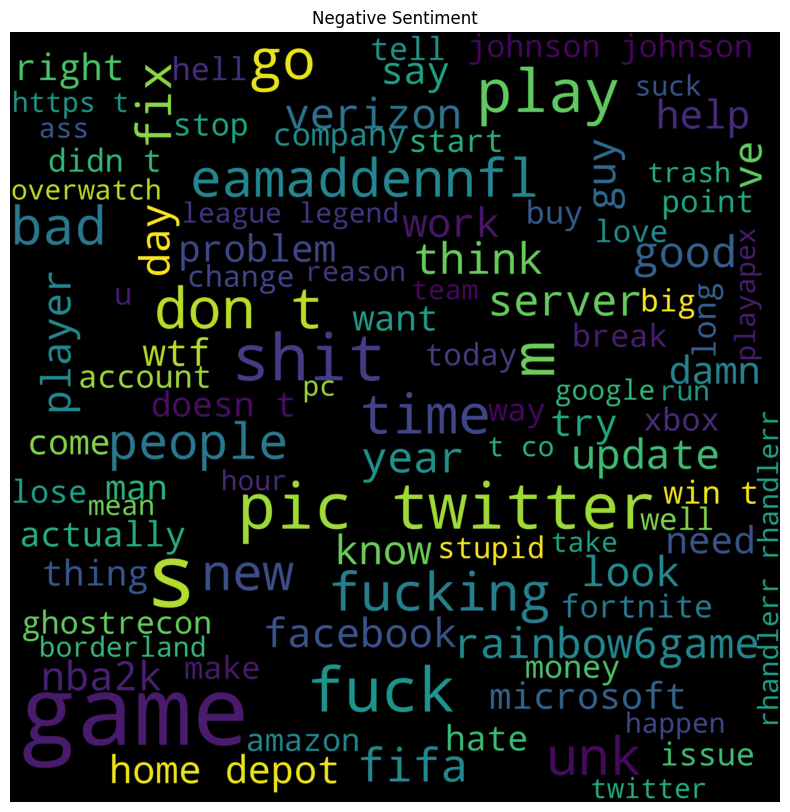

In [22]:
generate_wordcloud(negative_text, "Negative Sentiment")

In [23]:
# Initial Bag of Words
bow_counts1 = CountVectorizer(tokenizer=lambda text: text.split(), stop_words='english', ngram_range=(1, 1))


In [24]:
# Fit and transform the training data
X_train_bow = bow_counts1.fit_transform(balanced_train['cleaned_text'])
X_val_bow = bow_counts1.transform(val['cleaned_text'])


In [25]:
# Labels for train and validation encoding
y_train_bow = balanced_train['type']
y_val_bow = val['type']


In [26]:
# Machine Learning Algorithm
rf = RandomForestClassifier(random_state=42)

In [27]:
rf.fit(X_train_bow,y_train_bow)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf.predict(X_val_bow)

In [29]:
accuracy_score(y_val_bow,y_pred)

0.954

In [30]:
print(classification_report(y_val_bow,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.93      0.95       172
    Negative       0.95      0.95      0.95       266
     Neutral       0.96      0.96      0.96       285
    Positive       0.95      0.96      0.96       277

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [31]:
joblib.dump(rf,'model.pkl')

['model.pkl']

In [32]:
model = joblib.load('model.pkl')

In [33]:
y_pred = model.predict(X_val_bow)

In [34]:
accuracy_score(y_val_bow,y_pred)

0.954